# Lab 1 - Vectors and Matrices
This notebook demonstrates the use of vectors and matrices in IPython. Note that the basis is not explicit in any of these operations. You must keep track of the basis yourself (using variable names, or notes etc).

In [1]:
from numpy import array, dot, outer, sqrt, matrix
from numpy.linalg import eig, eigvals
from matplotlib.pyplot import hist

In [2]:
%matplotlib inline

In [3]:
rv = array([1,2])  # a row vector
rv

array([1, 2])

In [4]:
cv = array([[3],[4]])  # a column vector
cv

array([[3],
       [4]])

In [5]:
rv

array([1, 2])

Two kinds of vector products we'll see: inner product (dot product) and outer product

### 1) Use the function _dot(vector1, vector2)_ to find the dot product of rv and cv. Does the order of the arguments matter?

In [6]:
dot(rv,cv)

array([11])

In [7]:
dot(cv,rv)

ValueError: shapes (2,1) and (2,) not aligned: 1 (dim 1) != 2 (dim 0)

### 2) Use the function _outer(vector1, vector2)_ to find the outer product of rv and cv. Does the order of the arguments matter?

In [8]:
outer(rv,cv)

array([[3, 4],
       [6, 8]])

In [9]:
outer(cv,rv)

array([[3, 6],
       [4, 8]])

## II. Complex vectors

In [11]:
# Complex numbers in python have a j term:
a = 1+2j
a

(1+2j)

In [13]:
v1 = array([1+2j, 3+2j, 5+1j, 4+0j])
v1

array([1.+2.j, 3.+2.j, 5.+1.j, 4.+0.j])

The complex conjugate changes the sign of the imaginary part:

In [14]:
v1.conjugate()

array([1.-2.j, 3.-2.j, 5.-1.j, 4.-0.j])

### 3) Use _dot()_ and _.conjugate()_ to find the dot product of v1 and it's own conjugate:

In [15]:
dot(v1.conjugate(),v1)

(60+0j)

## III. Matrices

In [17]:
# a two-dimensional array
m1 = array([[0,1],[-2,3]])
m1

array([[ 0,  1],
       [-2,  3]])

In [18]:
# can find transpose with the T method:
m1.T

array([[ 0, -2],
       [ 1,  3]])

In [19]:
# find the eigenvalues and eigenvectors of a matrix:
eig(m1)

(array([1., 2.]), array([[-0.70710678, -0.4472136 ],
        [-0.70710678, -0.89442719]]))

Can also use the `matrix` type which is like array but restricts to 2D. Also, `matrix` adds `.H` and `.I` methods for hermitian and inverse, respectively. For more information, see Stack Overflow question [#4151128](http://stackoverflow.com/questions/4151128/what-are-the-differences-between-numpy-arrays-and-matrices-which-one-should-i-u)

In [20]:
m2 = matrix( [[2,1],[2,1]])

In [21]:
m2.H

matrix([[2, 2],
        [1, 1]])

In [24]:
evals, evec = eig(m2)

In [25]:
evals

array([3., 0.])

In [27]:
evec

matrix([[ 0.70710678, -0.4472136 ],
        [ 0.70710678,  0.89442719]])

In [40]:
# use a question mark to get help on a command
eig?

# Examples:
## Example 1.4
Find the eigenvalues and eigenvectors of M = ([0,1],[-2,3]])

In [28]:
M14 = array([[0,1],[-2,3]])

In [29]:
eig(M14)

(array([1., 2.]), array([[-0.70710678, -0.4472136 ],
        [-0.70710678, -0.89442719]]))

Interpret this result:
the two eigenvalues are 1 and 2
the eigenvectors are strange decimals, but we can check them against the stated solution:

In [30]:
1/sqrt(2)  # this is the value for both entries in the first eigenvector

0.7071067811865475

In [31]:
1/sqrt(5)  # this is the first value in the second eigenvector

0.4472135954999579

In [32]:
2/sqrt(5)  # this is the second value in the second eigenvector

0.8944271909999159

In [34]:
eig(M14)

(array([1., 2.]), array([[-0.70710678, -0.4472136 ],
        [-0.70710678, -0.89442719]]))

Signs are opposite compared to the book, but it turns out that (-) doesn't matter in the interpretation of eigenvectors: only "direction" matters (the relative size of the entries).

## Example: Problem 1.16 using Python functions

In [35]:
M16 = array([[0,-1j],[1j,0]])

In [36]:
evals, evecs = eig(M16)

In [37]:
evecs

array([[-0.        -0.70710678j,  0.70710678+0.j        ],
       [ 0.70710678+0.j        ,  0.        -0.70710678j]])

In [38]:
evecs[:,0]

array([-0.        -0.70710678j,  0.70710678+0.j        ])

In [39]:
evecs[:,1]

array([0.70710678+0.j        , 0.        -0.70710678j])

In [ ]:
dot(evecs[:,0].conjugate(),evecs[:,1])

# Part 2: Using QuTiP
Keeping track of row and column vectors in Ipython is somewhat artificial and tedious. The QuTiP library is designed to take care of many of these headaches

In [41]:
from qutip import *

In [42]:
# Create a row vector:
qv = Qobj([[1,2]])
qv

Quantum object: dims = [[1], [2]], shape = (1, 2), type = bra
Qobj data =
[[1. 2.]]

In [43]:
# Find the corresponding column vector
qv.dag()

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[1.]
 [2.]]

In [44]:
qv2 = Qobj([[1+2j,4-1j]])
qv2

Quantum object: dims = [[1], [2]], shape = (1, 2), type = bra
Qobj data =
[[1.+2.j 4.-1.j]]

In [45]:
qv2.dag()

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[1.-2.j]
 [4.+1.j]]

## Vector products in QuTiP
Only need to know one operator: "\*"
The product will depend on the order, either inner or outer

In [46]:
qv2*qv2.dag()  # inner product (dot product)

Quantum object: dims = [[1], [1]], shape = (1, 1), type = bra
Qobj data =
[[22.]]

In [47]:
qv2.dag()*qv2  # outer product

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 5.+0.j  2.-9.j]
 [ 2.+9.j 17.+0.j]]

## Matrix in QuTiP

In [48]:
qm = Qobj([[1,2],[2,1]])
qm

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[1. 2.]
 [2. 1.]]

In [49]:
qm.eigenenergies()  # in quantum (as we will learn) eigenvalues often correspond to energy levels

array([-1.,  3.])

In [50]:
evals, evecs = qm.eigenstates()

In [51]:
evecs

array([Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[-0.70710678]
 [ 0.70710678]],
       Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.70710678]
 [0.70710678]]], dtype=object)

In [53]:
evecs[0]

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[-0.70710678]
 [ 0.70710678]]

## Example from class:

In [55]:
qv = Qobj([[0,1],[-2,3]])
qv

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = False
Qobj data =
[[ 0.  1.]
 [-2.  3.]]

In [56]:
evals, evecs = qv.eigenstates()

In [57]:
evals

array([1.+0.j, 2.+0.j])

In [58]:
evecs

array([Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.70710678]
 [0.70710678]],
       Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.4472136 ]
 [0.89442719]]], dtype=object)

In [61]:
qv*evecs[0]

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.70710678]
 [0.70710678]]

In [63]:
qv*evecs[0] == evals[0]*evecs[0]

True

In [64]:
qv*evecs[1] == evals[1]*evecs[1]

True

# Some additional examples we have already done by hand:

## Problem 1.2 using the _hist()_ function.
Create a histogram of the data and from it estimate the probability distribution. Use min and max values for the range of 5 and 14, and use 5 bins (5 and 6 go in the first bin).

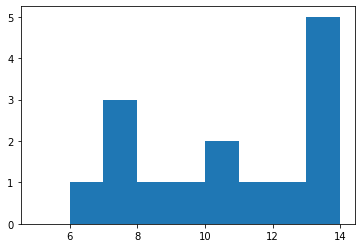

In [65]:
# Solution
data = [10,13,14,14,6,8,7,9,12,14,13,11,10,7,7]
# Fill in the hist() function:
n, bins, patches = hist(data, bins=9, range=(5,14))

## Problem 1.8
Find the constant $c$ that normalizes the probability density:
$$p(x) =
\begin{cases}
ce^{-ax},  & x \geq 0 \\[2ex]
0 & x < 0
\end{cases}
$$

**Hint:** using sympy, we can calculate the relevant integral. The conds='none' asks the solver to ignore any strange conditions on the variables in the integral. This is fine for most of our integrals. Usually the variables are real and well-behaved numbers.

In [66]:
# Partial Solution:
from sympy import *
c,a,x = symbols("c a x")
Q.positive((c,a))
first = integrate( c*exp(-a*x) ,(x,0,oo),conds='none')
first

c/a

In [67]:
check = integrate( a*exp(-a*x) ,(x,0,oo),conds='none')
check

1